<a href="https://colab.research.google.com/github/dudusnv/datasciense-desafio05/blob/main/RID_153473_Desafio05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Etapa 1- IMPORTANDO BIBLIOTECA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

Etapa 2 - UPLOAD DO ARQUIVO

In [ ]:
def carregar_dataset():
    print("Faça o upload do seu arquivo CSV:")
    uploaded = files.upload()

    # Obtendo o nome do arquivo carregado
    for filename in uploaded.keys():
        print(f"Arquivo {filename} carregado com sucesso!")

        # Lendo o arquivo em um DataFrame
        try:
            df = pd.read_csv(filename, encoding='utf-8')  # Tenta carregar com encoding utf-8
        except UnicodeDecodeError:
            print("Erro de encoding com UTF-8. Tentando com 'latin1'...")
            df = pd.read_csv(filename, encoding='latin1')  # Alternativa para problemas de encoding

        return df




Etapa 3 - CARREGANDO DATA SET

In [ ]:
df = carregar_dataset()

# Verificar se o dataset foi carregado antes de acessar o DataFrame
if df is not None:
    print("Visualizando as primeiras linhas do DataFrame:")
    print(df.head())
else:
    print("O DataFrame não foi carregado. Verifique o arquivo e tente novamente.")

Faça o upload do seu arquivo CSV:


Saving data.csv to data (2).csv
Arquivo data (2).csv carregado com sucesso!
Erro de encoding com UTF-8. Tentando com 'latin1'...
Visualizando as primeiras linhas do DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


Etapa 4 - INSPECIONANDO  OS DADOS

In [ ]:
# Visualizando as primeiras linhas
print(df.head())

# Resumo estatístico das colunas numéricas
print(df.describe())

# Tipos de dados das colunas
print(df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -8

Etapa 5 - VALORES FALTANTES NA IDENTIFICAÇÃO DO CLIENTE

In [ ]:
# Verificando valores nulos na coluna CustomerID
print(df['CustomerID'].isna().sum())

# Removendo registros com CustomerID nulo
df = df.dropna(subset=['CustomerID'])

135080


Etapa 6 - VERIFICANDO PREÇOS E QUANTIDADE ABAIXO OU IGUAL A ZERO

In [ ]:
# Verificando preços unitários iguais ou abaixo de zero
print(df[df['UnitPrice'] <= 0].shape)

# Removendo os registros com UnitPrice menor ou igual a zero
df = df[df['UnitPrice'] > 0]

# Verificando quantidades iguais ou abaixo de zero
print(df[df['Quantity'] <= 0].shape)

# Removendo os registros com Quantity menor ou igual a zero
df = df[df['Quantity'] > 0]

(40, 8)
(8905, 8)


Etapa 7 - REMOVENDO LINHAS DUPLICADAS

In [ ]:
# Verificando linhas duplicadas
print(df.duplicated().sum())

# Removendo duplicatas
df = df.drop_duplicates()

5192


Etapa 8 - AJUSTANDO TIPOS DE DADOS

In [ ]:
# Convertendo CustomerID para inteiro
df['CustomerID'] = df['CustomerID'].astype(int)

# Convertendo InvoiceDate para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Etapa 9 - TRATANDO OS OUTLIERS

In [ ]:
# Removendo outliers na coluna Quantity (> 10.000)
df = df[df['Quantity'] <= 10000]

# Removendo outliers na coluna UnitPrice (> 5.000)
df = df[df['UnitPrice'] <= 5000]

Etapa 10 - CRIANDO COLUNA ADICIONAL DE PREÇO TOTAL

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

Etapa 11- IDENTIFICANDO ÚLTIMA DATA NO DATA SET

In [ ]:
last_date = df['InvoiceDate'].max()
print(f"Última data no conjunto de dados: {last_date}")

Última data no conjunto de dados: 2011-12-09 12:50:00


Etapa 12 - PLOTANDO GRÁFICOS (EXEMPLO COM TOP 10 PAÍSES COM MAIOR VALOR DE VENDAS)

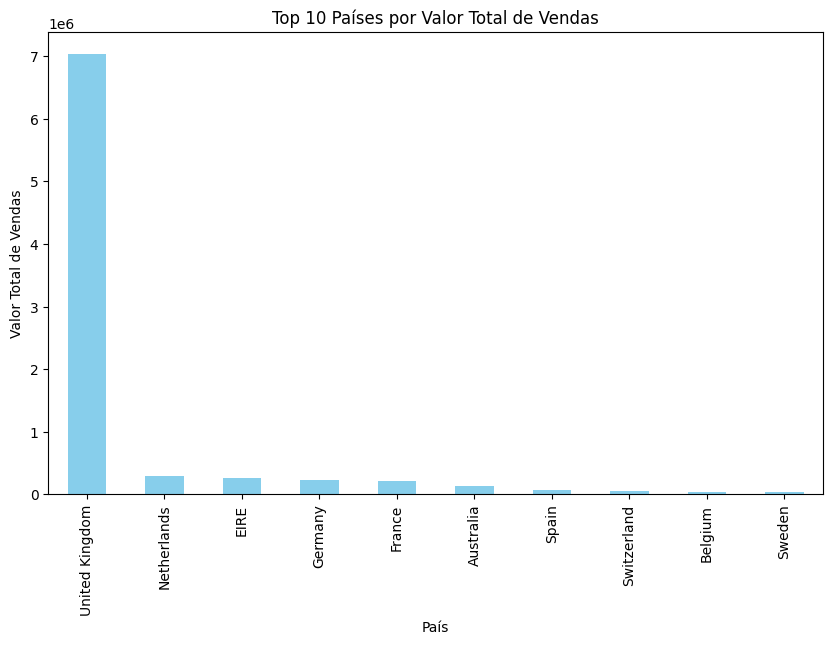

In [ ]:
# Top 10 países por valor total de vendas
top_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plotando
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Países por Valor Total de Vendas')
plt.ylabel('Valor Total de Vendas')
plt.xlabel('País')
plt.show()

Etapa 13 - CALCULANDO RMF

In [ ]:
# Agrupando por cliente
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max()).days,  # Recência
    'InvoiceNo': 'nunique',                              # Frequência
    'TotalPrice': 'mean'                                 # Ticket médio
}).reset_index()

# Renomeando as colunas
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Exportando o arquivo final
rfm_df.to_csv('RFM_output.csv', index=False)